In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as op

In [2]:
sheets=pd.read_excel('Regional Sales Dataset.xlsx',sheet_name=None)

In [3]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [4]:
#Assigning dataframe to each sheet
df_sales=sheets['Sales Orders']
df_customers=sheets['Customers']
df_products=sheets['Products']
df_regions=sheets['Regions']
df_state_reg=sheets['State Regions']
df_budgets=sheets['2017 Budgets']

In [5]:
print('df_sales shape:',(df_sales.shape))
print('df_customers shape:',(df_customers.shape))
print('df_products shape:',(df_products.shape))
print('df_regions shape:',(df_regions.shape))
print('df_state_reg shape:',(df_state_reg.shape))
print('df_budgets shape:',(df_budgets.shape))

df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (49, 3)
df_budgets shape: (30, 2)


In [6]:
#Changing the header of state_reg dataframe
new_header=df_state_reg.iloc[0]
df_state_reg.columns=new_header
df_state_reg=df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [7]:
#Checking for null values in sales dataframe
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [8]:
#Checking for null values in product dataframe
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [9]:
#Checking for null values in customers dataframe
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [10]:
#Checking for null values in regions dataframe
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [11]:
#Checking for null values in state_reg dataframe
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [12]:
#Checking for null values in budget dataframe
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

Data Cleaning and Wrangling

In [13]:
#Merge with Customers
df=df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [14]:
#Merge with Products
df=df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [15]:
#Merge with Regions
df=df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [16]:
df_state_reg = pd.read_excel("Regional Sales Dataset.xlsx", header=1)

In [17]:
df_state_reg = pd.read_excel(
    "Regional Sales Dataset.xlsx",
    sheet_name="State Regions",
    header=1
)

# Cleaning column names
df_state_reg.columns = df_state_reg.columns.str.strip()

print(df_state_reg.columns)

Index(['State Code', 'State', 'Region'], dtype='str')


In [18]:
#Merge with State Regions
df=df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [19]:
print(df_budgets.columns)

Index(['Product Name', '2017 Budgets'], dtype='str')


In [20]:
print(df.columns)

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region'],
      dtype='str')


In [22]:
df.columns = df.columns.str.strip().str.lower()

In [23]:
print(df.columns)

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer index', 'customer names',
       'index', 'product name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'state code', 'region'],
      dtype='str')


In [25]:
df = df.merge(
    df_budgets[['Product Name','2017 Budgets']],
    how='left',
    left_on='product name',
    right_on='Product Name'
)

In [26]:
df.rename(columns={'2017 Budgets':'budget'}, inplace=True)

In [27]:
df.head(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,population,households,median_income,land_area,water_area,time_zone,state code,region,Product Name,budget
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,South,Product 27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,Product 20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,Product 26,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,Product 7,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,Product 8,1085037.329


In [28]:
#Clean up redundant columns
cols_to_drop=['Customer Index','Index','id','State Code']
df=df.drop(columns=cols_to_drop,errors='ignore')

df.head(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,population,households,median_income,land_area,water_area,time_zone,state code,region,Product Name,budget
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,South,Product 27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,Product 20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,Product 26,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,Product 7,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,Product 8,1085037.329


In [29]:
df.columns=df.columns.str.lower()

df.columns.values

<StringArray>
[              'ordernumber',                 'orderdate',
       'customer name index',                   'channel',
             'currency code',            'warehouse code',
     'delivery region index', 'product description index',
            'order quantity',                'unit price',
                'line total',           'total unit cost',
            'customer index',            'customer names',
                     'index',              'product name',
                      'name',                    'county',
                'state_code',                     'state',
                      'type',                  'latitude',
                 'longitude',                 'area_code',
                'population',                'households',
             'median_income',                 'land_area',
                'water_area',                 'time_zone',
                'state code',                    'region',
              'product name',             

In [30]:
df.rename(columns={
    'product name_x':'product name',
    'state_code_x':'state_code',
    'state_x':'state',
    'latitude_x':'latitude',
    'longitude_x':'longitude'
}, inplace=True)

In [33]:
#Keeping the important columns and dropping the other columns
cols_to_keep=[
    'ordernumber',
    'orderdate',          
    'customer names',     
    'channel',            
    'product name',       
    'order quantity',     
    'unit price',         
    'line total',         
    'total unit cost',    
    'state_code',         
    'state',              
    'region',             
    'latitude',           
    'longitude',          
    'budget' 
]


In [34]:
df=df[cols_to_keep]

In [35]:
print(df.columns)

Index(['ordernumber', 'orderdate', 'customer names', 'channel', 'product name',
       'product name', 'order quantity', 'unit price', 'line total',
       'total unit cost', 'state_code', 'state', 'region', 'latitude',
       'longitude', 'budget'],
      dtype='str')


In [36]:
#Converting column name to snake_case
df=df.rename(columns={
    'ordernumber':'order_number',   
    'orderdate':'order_date',     
    'customer names':'customer_name',  
    'product name':'product_name',   
    'order quantity':'quantity',       
    'unit price':'unit_price',     
    'line total':'revenue',        
    'total unit cost':'cost',           
    'state_code':'state',          
    'state':'state_name',     
    'region':'us_region',      
    'latitude':'lat',            
    'longitude':'lon',            
    '2017 budgets':'budget'   
})

In [37]:
df.head()

,order_number,order_date,customer_name,channel,product_name,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [38]:
df.loc[df['order_date'].dt.year!=2017,'budget']=pd.NA
df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,product_name,revenue,budget
0,2014-01-01,Product 27,Product 27,14994.6,NaN
1,2014-01-01,Product 20,Product 20,25868.7,NaN
2,2014-01-01,Product 26,Product 26,5869.2,NaN
3,2014-01-01,Product 7,Product 7,16368.1,NaN
4,2014-01-01,Product 8,Product 8,18331.2,NaN
5,2014-01-01,Product 23,Product 23,57412.3,NaN
6,2014-01-01,Product 1,Product 1,20120.1,NaN
7,2014-01-01,Product 25,Product 25,10452.0,NaN
8,2014-01-01,Product 13,Product 13,19262.5,NaN
9,2014-01-01,Product 14,Product 14,34974.0,NaN


In [39]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  str           
 1   order_date     64104 non-null  datetime64[us]
 2   customer_name  64104 non-null  str           
 3   channel        64104 non-null  str           
 4   product_name   64104 non-null  str           
 5   product_name   64104 non-null  str           
 6   quantity       64104 non-null  int64         
 7   unit_price     64104 non-null  float64       
 8   revenue        64104 non-null  float64       
 9   cost           64104 non-null  float64       
 10  state          64104 non-null  str           
 11  state_name     64104 non-null  str           
 12  us_region      64104 non-null  str           
 13  lat            64104 non-null  float64       
 14  lon            64104 non-null  float64       
 15  budget         15263 non-null 

In [40]:
df.isnull().sum()

order_number         0
order_date           0
customer_name        0
channel              0
product_name         0
product_name         0
quantity             0
unit_price           0
revenue              0
cost                 0
state                0
state_name           0
us_region            0
lat                  0
lon                  0
budget           48841
dtype: int64

In [79]:
df['total_cost']=df['quantity']*df['cost']

In [81]:
df['profit']=df['revenue']-df['total_cost']
df['profit_margin_pct']=df['profit']/df['revenue']*100

In [82]:
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state_name,...,us_region,lat,lon,2017 budgets_x,budget,product_name,2017 budgets_y,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,964940.231,<NA>,Product 27,964940.231,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,2067108.120,<NA>,Product 20,2067108.120,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,5685138.270,<NA>,Product 26,5685138.270,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,889737.555,<NA>,Product 7,889737.555,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,1085037.329,<NA>,Product 8,1085037.329,10082.160,8249.040,45.0


EDA

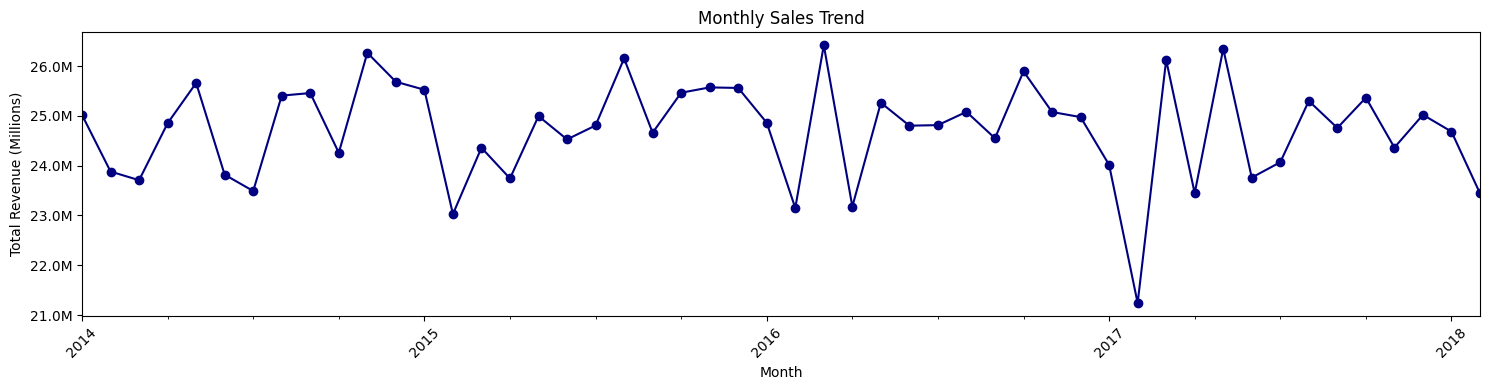

In [85]:
#Monthly Sales Trend Over Time
df['order_month']=df['order_date'].dt.to_period('M')

monthly_sales=df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter=FuncFormatter(lambda x,pos:f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [89]:
df.columns[df.columns=='product_name']

Index(['product_name', 'product_name'], dtype='str')

In [90]:
#Removing the duplicate product_name column
df=df.loc[:,~df.columns.duplicated()]

C:\Users\BIT\AppData\Local\Temp\ipykernel_6012\2373742673.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


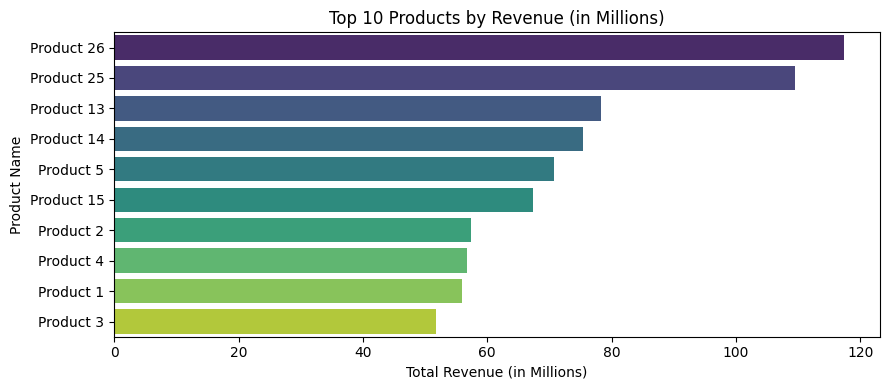

In [92]:
#Top 10 Products by Revenue (in Millions)
top_prod=df.groupby('product_name')['revenue'].sum()/1_000_000

top_prod=top_prod.nlargest(10)

plt.figure(figsize=(9,4))

sns.barplot(
    x=top_prod.values,
    y=top_prod.index,
    palette='viridis'
)

plt.title('Top 10 Products by Revenue (in Millions)')  
plt.xlabel('Total Revenue (in Millions)')              
plt.ylabel('Product Name')  

plt.tight_layout()

plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_6012\918874246.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


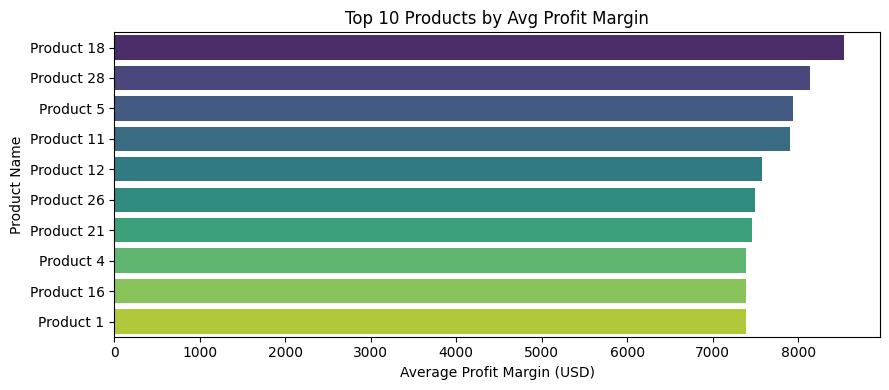

In [97]:
#Top 10 Products by Average Profit Margin
top_margin=(df.groupby('product_name')['profit'].mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(9, 4))

sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    palette='viridis'
)

plt.title('Top 10 Products by Avg Profit Margin')  
plt.xlabel('Average Profit Margin (USD)')          
plt.ylabel('Product Name') 

plt.tight_layout()
plt.show()

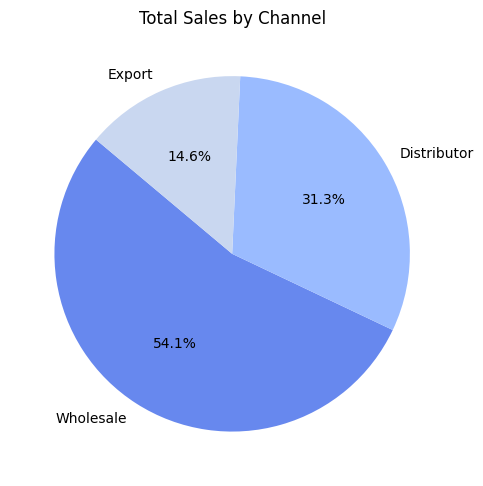

In [100]:
#Sales By Channel
chan_sales=df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5))

plt.pie(
    chan_sales.values,                   
    labels=chan_sales.index,             
    autopct='%1.1f%%',                   
    startangle=140,                      
    colors=sns.color_palette('coolwarm') 
)

plt.title('Total Sales by Channel')

plt.tight_layout()
plt.show()

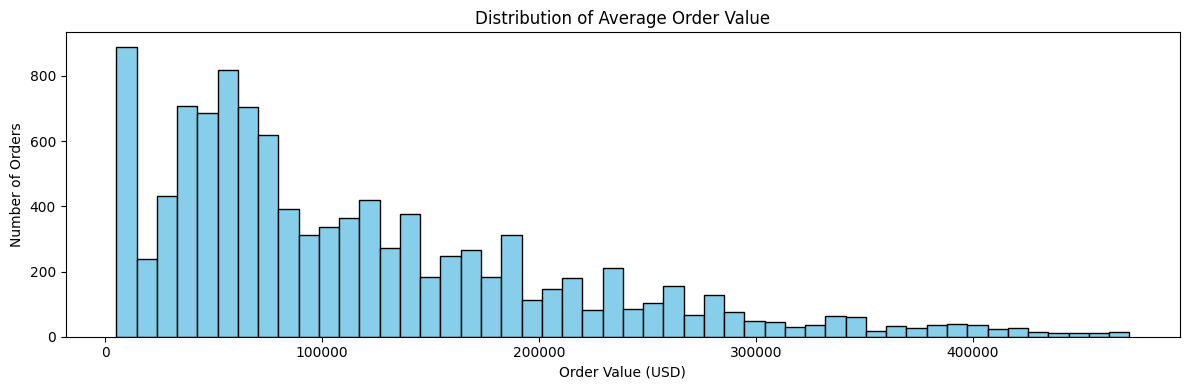

In [101]:
#Average Order Value Distribution
aov=df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,               
    bins=50,           
    color='skyblue',  
    edgecolor='black' 
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

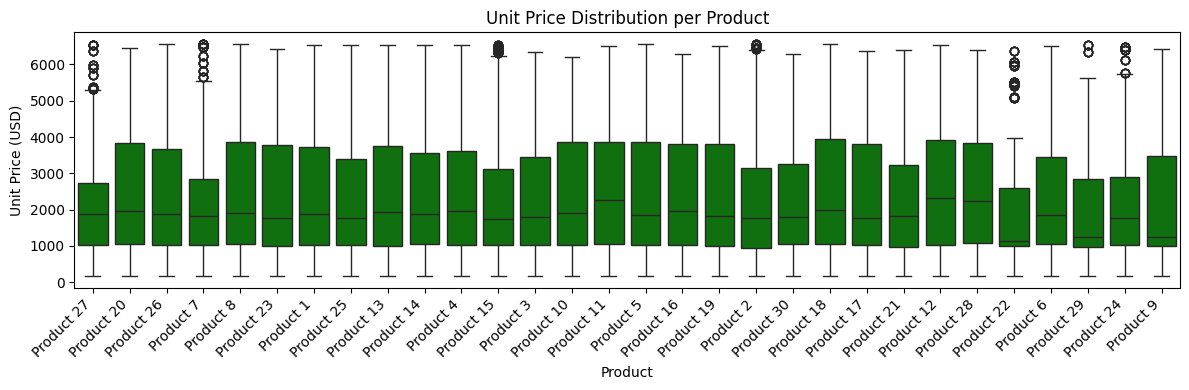

In [102]:
#Unit Price Distribution per Product
plt.figure(figsize=(12,4))

sns.boxplot(
    data=df,
    x='product_name',   
    y='unit_price',      
    color='g'            
)

plt.title('Unit Price Distribution per Product')  
plt.xlabel('Product')                              
plt.ylabel('Unit Price (USD)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_6012\3581787552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


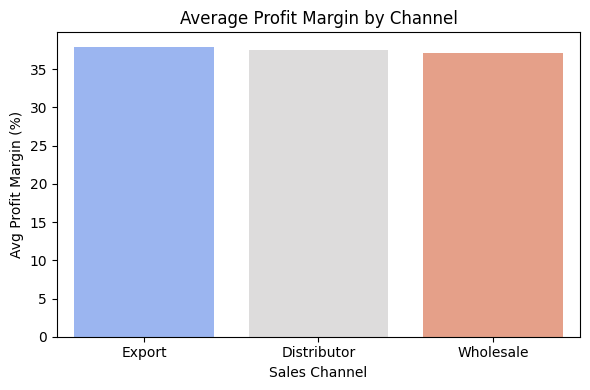

In [103]:
#Average Profit Margin by Channel
channel_margin=(df.groupby('channel')['profit_margin_pct'].mean().sort_values(ascending=False))

plt.figure(figsize=(6, 4))

sns.barplot(
    x=channel_margin.index,    
    y=channel_margin.values,   
    palette='coolwarm'         
)

plt.title('Average Profit Margin by Channel')  
plt.xlabel('Sales Channel')                    
plt.ylabel('Avg Profit Margin (%)') 

plt.tight_layout()
plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_6012\2267827701.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


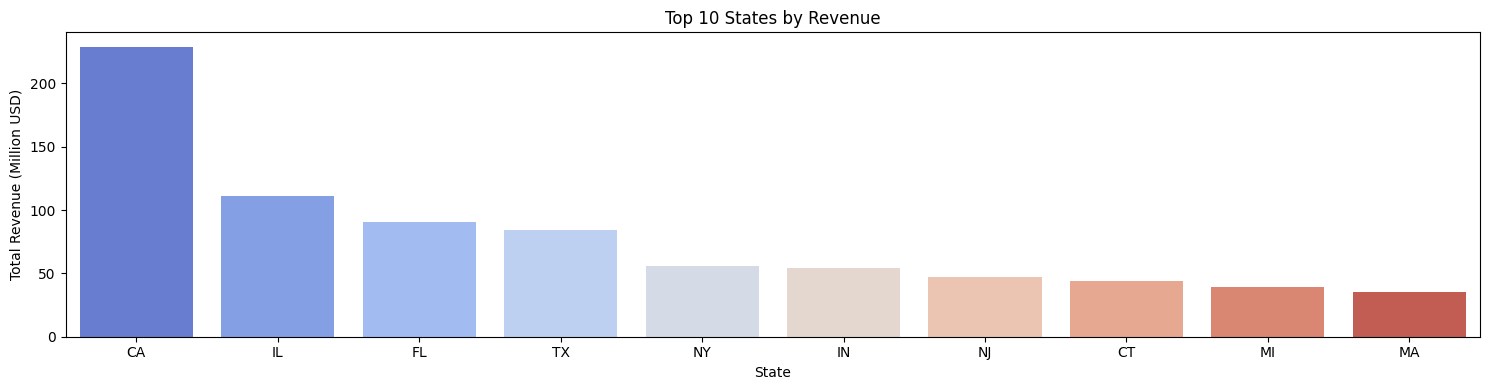

C:\Users\BIT\AppData\Local\Temp\ipykernel_6012\2267827701.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


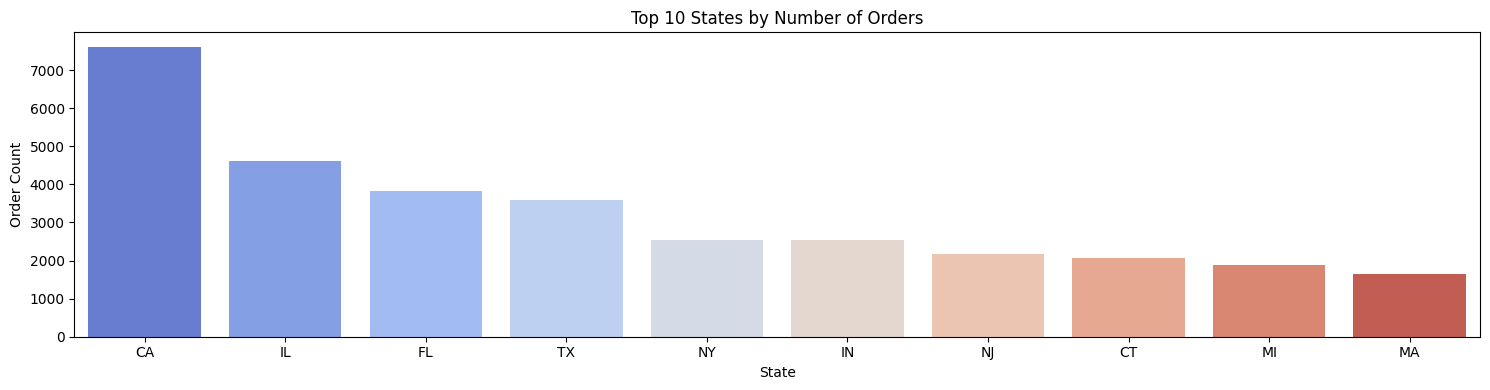

In [107]:
#Top 10 States By Revenue and Order Count
state_rev=df.groupby('state_name').agg(revenue=('revenue','sum'),orders=('order_number','nunique')).sort_values('revenue',ascending=False).head(10)

#Top 10 States By Revenue
plt.figure(figsize=(15, 4))

sns.barplot(
    x=state_rev.index,                   
    y=state_rev['revenue']/1e6,        
    palette='coolwarm'                   
)

plt.title('Top 10 States by Revenue')     
plt.xlabel('State')                       
plt.ylabel('Total Revenue (Million USD)') 

plt.tight_layout()                       
plt.show()     

#Top 10 States By Order Count
plt.figure(figsize=(15, 4))

sns.barplot(
    x=state_rev.index,                   
    y=state_rev['orders'],               
    palette='coolwarm'          
)
         
plt.title('Top 10 States by Number of Orders')  
plt.xlabel('State')                              
plt.ylabel('Order Count')    

plt.tight_layout()         
plt.show()                      

C:\Users\BIT\AppData\Local\Temp\ipykernel_6012\3083905243.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\BIT\AppData\Local\Temp\ipykernel_6012\3083905243.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


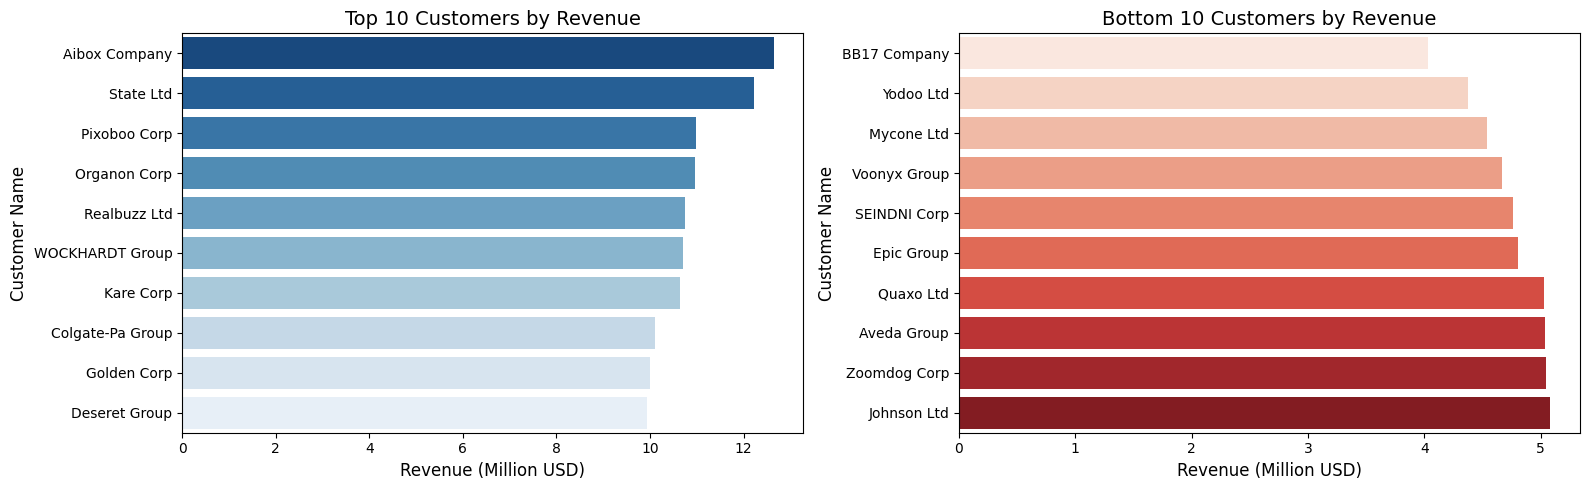

In [108]:
#Top and Bottom 10 Customers by Revenue
top_rev=(df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False).head(10))

bottom_rev=(df.groupby('customer_name')['revenue'].sum().sort_values(ascending=True).head(10))

fig,axes=plt.subplots(1,2,figsize=(16, 5))

#Top 10 Customers By Revenue
sns.barplot(
    x=top_rev.values/1e6,    
    y=top_rev.index,           
    palette='Blues_r',         
    ax=axes[0]                 
)

axes[0].set_title('Top 10 Customers by Revenue',fontsize=14)         
axes[0].set_xlabel('Revenue (Million USD)',fontsize=12)              
axes[0].set_ylabel('Customer Name',fontsize=12) 

#Bottom 10 Customers By Revenue
sns.barplot(
    x=bottom_rev.values/1e6,  
    y=bottom_rev.index,        
    palette='Reds',            
    ax=axes[1]                 
)
axes[1].set_title('Bottom 10 Customers by Revenue',fontsize=14)      
axes[1].set_xlabel('Revenue (Million USD)',fontsize=12)              
axes[1].set_ylabel('Customer Name',fontsize=12)    

plt.tight_layout()
plt.show()
